# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [134]:
import pandas as pd
import numpy as np


In [135]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [136]:
import requests

In [137]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

r = requests.get(url, auth=('user', 'pass'))

with open("image_predictions1.tsv" , 'wb') as f:
    f.write(r.content)



In [138]:
df_images = pd.read_csv("image_predictions1.tsv" , sep="\t")
df_images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [139]:
# I couldn't create a developer account in twitter due it require a phone number, 
# and my number are already been used in a different acount which i lost.

# Therfore i will access the data from the url that been given using the request libary


url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"

r = requests.get(url)

with open("tweet-json.txt" , 'wb') as f:
    f.write(r.content)


# with open("tweet-json.txt" , 'r') as read:
#     tweet_json = read.readline()
# tweet_json


In [140]:
df_tweets = pd.read_json('tweet-json.txt',lines=True)

df_tweets = df_tweets[['id', 'favorite_count', 'retweet_count']]

df_tweets.head()


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Twitter Archive data


In [141]:
df_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
726,782598640137187329,NaN,NaN,2016-10-02 15:10:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timmy. He's quite large. According to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782598640...,11,10,Timmy,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### many rows have no stage of the dog



In [142]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [143]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### There some wrong formats such as timestamp 

In [144]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Toby          7
Buddy         7
Stanley       6
Milo          6
Dave          6
Rusty         6
Koda          6
Scout         6
Oscar         6
Jax           6
Leo           6
Bella         6
Jack          6
Larry         5
           ... 
Alfy          1
Al            1
Sora          1
Humphrey      1
Rufio         1
Socks         1
Iggy          1
Aja           1
Daniel        1
Kawhi         1
Rose          1
Olaf          1
Robin         1
Bertson       1
this          1
Burt          1
Tilly         1
Zeek          1
Mason         1
Shawwn        1
Jaycob        1
Franq         1
Willem        1
Huck          1
Lorelei       1
Sephie        1
Charl         1
BeBe          1
Laela         1
Emanuel       1
Name: name, Length: 957,

#### There are some Wrong names such as 'a''the'

In [145]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [146]:
pd.options.display.max_colwidth = 50
df_archive.source[0]


'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [147]:
df_archive.text[5]


"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [148]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Image Prediction data

In [149]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Around 60% confident on the first prediction, not bad

In [150]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
df_images[df_images.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [152]:
df_images.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
1874,845397057150107648,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True


In [153]:
df_images['p1'].value_counts().nlargest(5)


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

In [154]:
df_images['p2'].value_counts().nlargest(5)


Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
Name: p2, dtype: int64

## Twitter API data

In [155]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [156]:
df_tweets[df_tweets.id.duplicated()]

,id,favorite_count,retweet_count


In [157]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Twitter-archive data issues

### Quality Issues

    - There is missing data in (expanded_urls) column.
    - Remove the data that are retweeted.
    - Remove unwanted columns.
    - (name) column has some wrong enrty's such as: 'a', 'None'.
    - All (timestamps) columns are in type object.
    - Dogs ratings arent right where the rating_denominator are higher than rating_numerator
    - (source) column contains some unuseful information. 
    
    
#### Tidy Issues:
    - The columns (doggo, floofer, pupper, puppo) belongs to one variable, and each variable should have its       own column.
    
    
    


##  Image Prediction data

### Quality Issues

    - Some of the images aren't dogs images, so will remove any enrty that dosen't contain any dogs images.
    - Some names of dog breeds are not defined, like 'orange'.


### Tide Issues
    - this data set is part of the same observational as in the archive data. Therfore will merge it to one single table, each table should represent a single observational unit.


# Tweets data
### Quality Issues

    - Rename the column (id) to (tweet_id), to merge the datasets.

### Tidy Issues
    - data set is part of the same observational as in the merged data above, Therfore will merge it with merged data above into one single table.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [158]:
df_archive_2 = df_archive.copy()
df_images_2 = df_images.copy()
df_tweets_2 = df_tweets.copy()

# 1. First - Twitter-archive data


### Remove the retweet tweets from  twitter-archive data

In [159]:
df_archive_2 = df_archive_2[df_archive_2.retweeted_status_id.isnull()]



In [160]:
# Test no retweeted tweets.
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### keep tweets which have their URLS

In [161]:
null_url = pd.notnull(df_archive_2["expanded_urls"])

df_archive_2 = df_archive_2[null_url]


In [162]:
# Test All tweets have their URLS
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

### Fix naming issues at (name) Column 
There some words that could be a name therefore will just change (a,an,the,none) to None

In [163]:
non_names = ['a' , "an",'the','none']
df_archive_2["name"] = df_archive_2["name"].replace(non_names , "None")



In [164]:
# Test names are all valid
df_archive_2.name.value_counts()

None        691
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Bailey        6
Bella         6
Oscar         6
Stanley       6
Jax           6
Koda          6
Bo            6
Milo          5
Scout         5
Bentley       5
Leo           5
Chester       5
Buddy         5
Rusty         5
Louis         5
Dave          5
Dexter        4
Brody         4
           ... 
Gustaf        1
Willy         1
Akumi         1
Evy           1
Jaycob        1
Mason         1
Daniel        1
Zeek          1
Angel         1
Lilah         1
Tuck          1
Maks          1
Damon         1
Logan         1
Leonidas      1
Dixie         1
Cupid         1
Taco          1
Cermet        1
Jim           1
Kawhi         1
Rose          1
Alfy          1
Robin         1
Bertson       1
this          1
Philbert      1
Burt          1
Tilly         1
Emanuel       1
Name: name, Length: 953,

### Create new column (stage) for columns (doggo, floofer, pupper, and puppo)


In [165]:
df_archive_2.query("pupper == 'pupper' and doggo == 'doggo' ").sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None


#### Some rows have more than one stage, therfore will add another stage which can have more than one stage such as doggo,pupper

In [166]:
df_archive_2.query("pupper == 'pupper' and doggo == 'doggo' ").sample().index

Int64Index([1113], dtype='int64')

In [167]:
# First replace None in stage columns with an empty string as follows.
df_archive_2.doggo.replace('None', '', inplace=True)
df_archive_2.floofer.replace('None', '', inplace=True)
df_archive_2.pupper.replace('None', '', inplace=True)
df_archive_2.puppo.replace('None', '', inplace=True)


# Then combine stage columns.
df_archive_2['stage'] = df_archive_2.doggo + df_archive_2.floofer + df_archive_2.pupper + df_archive_2.puppo

# # Then format entries with multiple dog stages which appeared like doggopupper.
df_archive_2.loc[df_archive_2.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_archive_2.loc[df_archive_2.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_archive_2.loc[df_archive_2.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [168]:
df_archive_2.stage.replace({'': np.nan}, inplace=True)



In [169]:
# Test same sample above 
df_archive_2.loc[[575]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,"doggo,pupper"


### Change timestamp to datetime type

In [170]:
df_archive_2['timestamp'] = pd.to_datetime(df_archive_2['timestamp'])



In [171]:
# Test the type of timestamp column
df_archive_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
stage                         

### Create a new column (rating) from dividing rating_numerator from rating_denominator and multiply by 10.  

In [172]:
df_archive_2["rating"] = (df_archive_2["rating_numerator"] / df_archive_2["rating_denominator"])*10
df_archive_2["rating"] = df_archive_2["rating"].astype(int)

In [173]:
df_archive_2.rating.value_counts()


12      493
10      438
11      423
13      295
9       154
8        99
7        51
14       40
5        35
6        33
3        19
4        15
2        10
1         4
0         2
75        1
26        1
34        1
27        1
1776      1
420       1
Name: rating, dtype: int64

 ### Any dogs have ratings below 10 got fixed to 10 because dogs deserve.


In [174]:
df_archive_2["rating"][df_archive_2["rating"] <10] = 10



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
# Test if minimum rating are 10
df_archive_2.rating.value_counts()

10      860
12      493
11      423
13      295
14       40
75        1
27        1
1776      1
420       1
34        1
26        1
Name: rating, dtype: int64

### Extract just the source from the texts without the tags (source) column

In [176]:
df_archive.source.sample(5)


222     <a href="http://twitter.com/download/iphone" r...
1395    <a href="http://twitter.com/download/iphone" r...
440     <a href="http://twitter.com/download/iphone" r...
865     <a href="http://twitter.com/download/iphone" r...
1101    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [177]:

df_archive_2['source'] = df_archive_2['source'].str.extract(
    '(Twitter for iPhone|Vine - Make a Scene|Twitter Web Client|TweetDeck)')



In [178]:
# Test source column
df_archive_2.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Drop unwanted columns

In [179]:
col = ["doggo" , "floofer", 'pupper', 'puppo','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp',"rating_numerator","rating_denominator", "in_reply_to_user_id","in_reply_to_status_id"]

df_archive_2.drop(col , axis=1 , inplace=True)



In [180]:
# Test the columns get dropped-
df_archive_2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'stage', 'rating'],
      dtype='object')

# Twitter-archive data completed

In [181]:
df_archive_2.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,stage,rating
2324,666421158376562688,2015-11-17 01:02:40,Twitter for iPhone,*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,None,NaN,12
2032,671763349865160704,2015-12-01 18:50:38,Twitter for iPhone,Say hello to Mark. He's a good dog. Always rea...,https://twitter.com/dog_rates/status/671763349...,Mark,NaN,10
1324,706169069255446529,2016-03-05 17:26:40,Twitter for iPhone,He was doing his best. 12/10 I'll be his lawye...,https://twitter.com/wgnnews/status/70616592080...,None,NaN,12
1140,727685679342333952,2016-05-04 02:26:00,Twitter for iPhone,This is Cilantro. She's a Fellation Gadzooks. ...,https://twitter.com/dog_rates/status/727685679...,Cilantro,NaN,12
1054,742423170473463808,2016-06-13 18:27:32,Twitter for iPhone,This is Bell. She likes holding hands. 12/10 w...,https://twitter.com/dog_rates/status/742423170...,Bell,NaN,12


# Second - Image Prediction data

## Cleaning

In [182]:
df_images_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [183]:
from IPython.display import Image 
Image(url='https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg')


#### Turn that some of the images where classified wrong by the model as shown above. The image is from tweet_id: 892420643555336193


### Remove all rows which wasnt classifed as a dog by the model from all three prediction.

In [184]:
df_images_2 = df_images_2.query('p1_dog == True or p2_dog == True or p3_dog == True')


In [185]:
df_images_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True


In [186]:

# Test if all nor dog images been dropped
df_images_2.query('p1_dog == False and p2_dog == False and p3_dog == False').shape


(0, 12)

### Merging the archive dataset and image dataset

In [187]:
merged_df = df_images_2.merge(df_archive_2, on='tweet_id' , how="inner")

#Test the merged data √
merged_df.sample(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,name,stage,rating
186,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True,2015-11-28 04:03:11,Twitter for iPhone,This dog can't see its haters. 11/10 https://t...,https://twitter.com/dog_rates/status/670452855...,None,NaN,11
818,709918798883774466,https://pbs.twimg.com/media/CdojYQmW8AApv4h.jpg,2,Pembroke,0.956222,True,Cardigan,0.020727,True,Chihuahua,0.007912,True,2016-03-16 01:46:45,Twitter for iPhone,Meet Watson. He's a Suzuki Tickleboop. Leader ...,https://twitter.com/dog_rates/status/709918798...,Watson,NaN,12


In [188]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 19 columns):
tweet_id         1686 non-null int64
jpg_url          1686 non-null object
img_num          1686 non-null int64
p1               1686 non-null object
p1_conf          1686 non-null float64
p1_dog           1686 non-null bool
p2               1686 non-null object
p2_conf          1686 non-null float64
p2_dog           1686 non-null bool
p3               1686 non-null object
p3_conf          1686 non-null float64
p3_dog           1686 non-null bool
timestamp        1686 non-null datetime64[ns]
source           1686 non-null object
text             1686 non-null object
expanded_urls    1686 non-null object
name             1686 non-null object
stage            260 non-null object
rating           1686 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 228.9+ KB


# Image Prediction data completed

# Third - Tweet data

## Cleaning

#### Rename column (id) to (tweet_id)
 

In [189]:
df_tweets_2 = df_tweets_2.rename(columns={"id":"tweet_id"})
df_tweets_2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [190]:
df_tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Merge df_tweets_2 with the previous merged set, to obtain the combined master dataset.

In [191]:
data = df_tweets_2.merge(merged_df, on='tweet_id' , how="inner")

#Test the Master data √

data.sample(5)

,tweet_id,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,p3,p3_conf,p3_dog,timestamp,source,text,expanded_urls,name,stage,rating
1036,693231807727280129,3133,841,https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg,1,vizsla,0.876413,True,Chesapeake_Bay_retriever,0.078400,...,Rhodesian_ridgeback,0.032194,True,2016-01-30 00:38:37,Twitter for iPhone,"This is Bodie. He's not proud of what he did, ...",https://twitter.com/dog_rates/status/693231807...,Bodie,NaN,10
617,753375668877008896,8411,2655,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,...,tripod,0.098207,False,2016-07-13 23:48:51,Twitter for iPhone,This is Hank. He's mischievous af. Doesn't eve...,https://twitter.com/dog_rates/status/753375668...,Hank,NaN,10
317,815990720817401858,5545,1207,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,Chihuahua,0.428756,True,miniature_pinscher,0.103912,...,Staffordshire_bullterrier,0.088959,True,2017-01-02 18:38:42,Twitter for iPhone,Meet Jack. He's one of the rare doggos that do...,https://www.gofundme.com/surgeryforjacktheminp...,Jack,NaN,11
1614,667517642048163840,389,203,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,True,standard_poodle,0.084572,...,cocker_spaniel,0.081347,True,2015-11-20 01:39:42,Twitter Web Client,This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,Dook,NaN,10
1545,669327207240699904,610,127,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,...,kuvasz,0.010216,True,2015-11-25 01:30:16,Twitter for iPhone,Just got home from college. Dis my dog. She do...,https://twitter.com/dog_rates/status/669327207...,None,NaN,13


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 21 columns):
tweet_id          1686 non-null int64
favorite_count    1686 non-null int64
retweet_count     1686 non-null int64
jpg_url           1686 non-null object
img_num           1686 non-null int64
p1                1686 non-null object
p1_conf           1686 non-null float64
p1_dog            1686 non-null bool
p2                1686 non-null object
p2_conf           1686 non-null float64
p2_dog            1686 non-null bool
p3                1686 non-null object
p3_conf           1686 non-null float64
p3_dog            1686 non-null bool
timestamp         1686 non-null datetime64[ns]
source            1686 non-null object
text              1686 non-null object
expanded_urls     1686 non-null object
name              1686 non-null object
stage             260 non-null object
rating            1686 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(5), object(9)
memory 

# Cleaned Completed

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [193]:
data.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Q1: What is the most common dog breed exist in dataset.

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

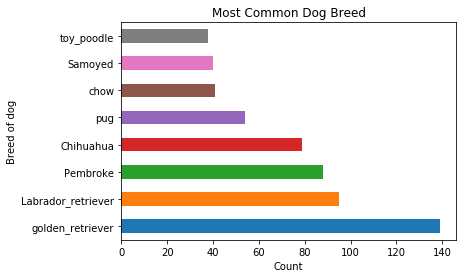

In [195]:

data['p1'].value_counts().nlargest(8).plot(kind = 'barh')
plt.title('Most Common Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

####  It was shown from the visualization that the most popular breed is a golden retriever, and Labrador retriever in second as the most popular breeds.

### Q2: Is there a correlation between the attributes.

In [196]:
data["p1_dog"] = data.p1_dog.astype("str")

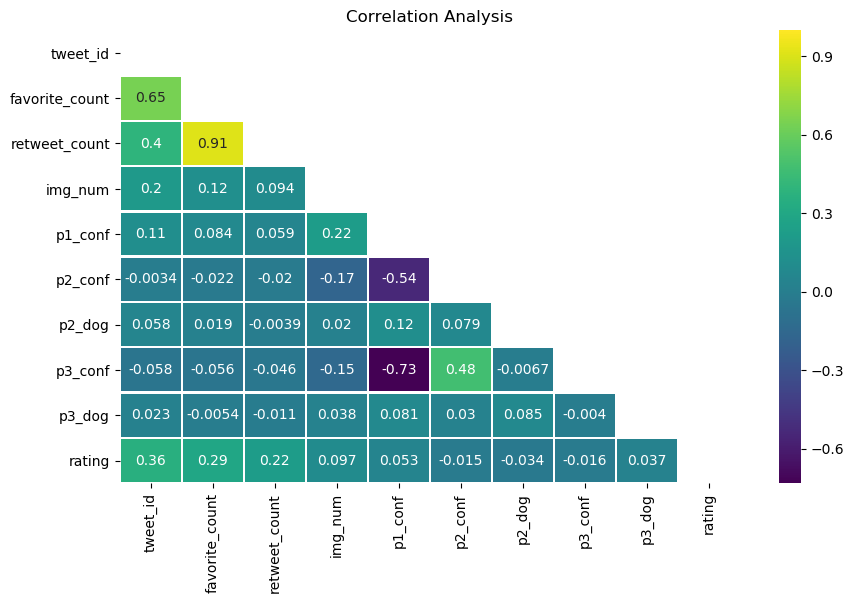

In [197]:
corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(figsize=(10,6), dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(data.corr() ,mask=mask,annot=True,lw=1,linecolor='white',cmap='viridis')
plt.show()

#### It turns that there is a high correlation between the retweets and favorites around 91%, which makes sense because the more people see the tweet its more likely to get favorite. Moreover, there a small correlation around 29% between the rating and favorites.

### Q3: About breeds dogs, what are most and less breeds received favorites.

### Most Favorite:

In [198]:
df_retweet = data[["p1","favorite_count"]]

df_retweet.sort_values(by="favorite_count" , ascending=False).head(6)




,p1,favorite_count
278,Lakeland_terrier,132810
691,Labrador_retriever,131075
53,English_springer,107956
363,Chihuahua,107015
100,French_bulldog,106827
299,standard_poodle,95450


#### 3- Looks like Lakeland_terrier and Labrador_retriever are more likeable than others. 

### Less Favorite:

In [199]:
df_retweet = data[["p1","favorite_count"]]

df_retweet.sort_values(by="favorite_count").head(6)

,p1,favorite_count
1670,English_setter,81
1655,curly-coated_retriever,107
1681,miniature_pinscher,111
1662,black-and-tan_coonhound,113
1677,miniature_poodle,115
1673,pug,121


#### 4- There are many dogs havent recived a single favorite.